In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu7_data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.loc[df_study.session < 500]
df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
95995,1507,755,TRIGGER,JELLY,7,15,499
95996,1635,616,ZEBRA,FURNITURE,8,15,499
95997,1313,175,SKATE,BRIEFCASE,9,15,499
95998,981,1438,ORCHESTRA,TAXI,10,15,499


In [4]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
63995,1297,SHRIMP,1053,3,0,15,499
63996,1205,ROOF,1156,1,0,15,499
63997,1436,TART,488,11,0,15,499
63998,755,JELLY,1507,7,1,15,499


### Run CMR-IA

In [5]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.1,
    beta_cue = 0.5,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.1,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6,
 'use_new_context': False}

In [7]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params, df_study, df_test, s_mat)
df_simu

CMR2 Time: 211.27185797691345


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,824.0,1170.0,0.794596
1,0,0,1347,823.0,1690.0,0.801643
2,0,0,413,524.0,1880.0,0.846204
3,0,0,812,1323.0,1460.0,0.800777
4,0,0,110,879.0,2580.0,0.704821
...,...,...,...,...,...,...
63995,15,499,1297,1205.0,2600.0,0.652096
63996,15,499,1205,1156.0,1440.0,0.885791
63997,15,499,1436,1311.0,2680.0,0.685914
63998,15,499,755,-1.0,-1.0,-1.000000


In [8]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,824.0,1170.0,0.794596,CLIPPERS,823,9,1,False
1,0,0,1347,823.0,1690.0,0.801643,SPARROW,1051,8,1,False
2,0,0,413,524.0,1880.0,0.846204,CROSS,524,7,0,True
3,0,0,812,1323.0,1460.0,0.800777,LEOPARD,1323,5,0,True
4,0,0,110,879.0,2580.0,0.704821,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1205.0,2600.0,0.652096,SHRIMP,1053,3,0,False
63996,15,499,1205,1156.0,1440.0,0.885791,ROOF,1156,1,0,True
63997,15,499,1436,1311.0,2680.0,0.685914,TART,488,11,0,False
63998,15,499,755,-1.0,-1.0,-1.000000,JELLY,1507,7,1,False


In [9]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,824.0,1170.0,0.794596,CLIPPERS,823,9,1,False,0.0,11.0
1,0,0,1347,823.0,1690.0,0.801643,SPARROW,1051,8,1,False,0.0,9.0
2,0,0,413,524.0,1880.0,0.846204,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,1323.0,1460.0,0.800777,LEOPARD,1323,5,0,True,0.0,5.0
4,0,0,110,879.0,2580.0,0.704821,BED,1083,0,0,False,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1205.0,2600.0,0.652096,SHRIMP,1053,3,0,False,15.0,1.0
63996,15,499,1205,1156.0,1440.0,0.885791,ROOF,1156,1,0,True,15.0,1.0
63997,15,499,1436,1311.0,2680.0,0.685914,TART,488,11,0,False,15.0,0.0
63998,15,499,755,-1.0,-1.0,-1.000000,JELLY,1507,7,1,False,NaN,NaN


In [10]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,824.0,1170.0,0.794596,CLIPPERS,823,9,1,False,0.0,11.0,0.0,2.0,ILI
1,0,0,1347,823.0,1690.0,0.801643,SPARROW,1051,8,1,False,0.0,9.0,0.0,1.0,ILI
2,0,0,413,524.0,1880.0,0.846204,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,1323.0,1460.0,0.800777,LEOPARD,1323,5,0,True,0.0,5.0,0.0,0.0,Correct
4,0,0,110,879.0,2580.0,0.704821,BED,1083,0,0,False,0.0,6.0,0.0,6.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1205.0,2600.0,0.652096,SHRIMP,1053,3,0,False,15.0,1.0,0.0,-2.0,ILI
63996,15,499,1205,1156.0,1440.0,0.885791,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1311.0,2680.0,0.685914,TART,488,11,0,False,15.0,0.0,0.0,-11.0,ILI
63998,15,499,755,-1.0,-1.0,-1.000000,JELLY,1507,7,1,False,NaN,NaN,NaN,NaN,NoResp


In [11]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1610.0,0.769270,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1850.0,0.763325,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1980.0,0.844336,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,232.0,3430.0,0.756408,DUNE,1534,11,0,False,1.0,9.0,0.0,-2.0,ILI
12,1,0,844,396.0,1560.0,0.816025,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1205.0,2600.0,0.652096,SHRIMP,1053,3,0,False,15.0,1.0,0.0,-2.0,ILI
63996,15,499,1205,1156.0,1440.0,0.885791,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1311.0,2680.0,0.685914,TART,488,11,0,False,15.0,0.0,0.0,-11.0,ILI
63998,15,499,755,-1.0,-1.0,-1.000000,JELLY,1507,7,1,False,NaN,NaN,NaN,NaN,NoResp


In [12]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1610.0,0.769270,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1850.0,0.763325,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1980.0,0.844336,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,232.0,3430.0,0.756408,DUNE,1534,11,0,False,1.0,9.0,0.0,-2.0,ILI
12,1,0,844,396.0,1560.0,0.816025,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
13,1,0,586,1446.0,2020.0,0.857152,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,2560.0,0.847545,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1670.0,0.846179,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,492.0,2040.0,0.836978,BRIDE,414,10,0,False,2.0,11.0,0.0,1.0,ILI
17,2,0,492,845.0,2160.0,0.859682,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [13]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    28603
ILI        20513
NoResp     10019
PLI          865
Name: list, dtype: int64

In [14]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.4767166666666667

In [15]:
df_simu.to_pickle("simu7_data/simu7_result.pkl")

In [16]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [17]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [18]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [19]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLI

In [20]:
with open("simu7_data/simu7_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [21]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,1,14.0,0.001488
1,-13.0,3,13.0,0.004464
2,-12.0,5,12.0,0.007440
3,-11.0,4,11.0,0.005952
4,-10.0,8,10.0,0.011905
5,-9.0,11,9.0,0.016369
6,-8.0,20,8.0,0.029762
7,-7.0,36,7.0,0.053571
8,-6.0,38,6.0,0.056548
9,-5.0,43,5.0,0.063988


In [22]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
106,13,0,1389,1119.0,3550.0,0.525104,STRANGER,983,10,1,False,1.0,0.0,-12.0,-10.0,PLI
218,11,1,444,93.0,2150.0,0.542327,DEER,1217,7,1,False,9.0,0.0,-2.0,-7.0,PLI
224,12,1,7,1331.0,2770.0,0.582363,ADOLESCENT,1483,8,0,False,9.0,0.0,-3.0,-8.0,PLI
227,12,1,455,1271.0,2670.0,0.513747,DETERGENT,1473,10,1,False,10.0,0.0,-2.0,-10.0,PLI
229,12,1,1299,144.0,3000.0,0.566658,SHRUB,644,6,1,False,7.0,1.0,-5.0,-5.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63158,6,493,194,1451.0,3230.0,0.566313,BULLET,453,6,0,False,3.0,0.0,-3.0,-6.0,PLI
63449,11,495,1300,1317.0,3270.0,0.512570,SHUTTER,350,7,1,False,7.0,1.0,-4.0,-6.0,PLI
63566,9,496,972,490.0,3380.0,0.612681,OFFICE,1447,8,0,False,7.0,1.0,-2.0,-7.0,PLI
63588,12,496,1217,1028.0,2580.0,0.592099,RUM,1615,10,1,False,9.0,0.0,-3.0,-10.0,PLI


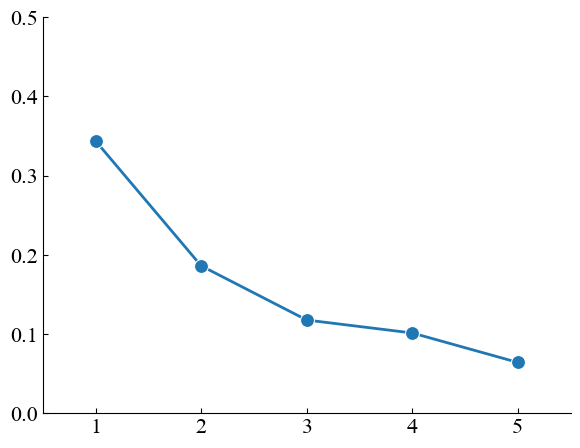

In [30]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
# plt.tick_params(labelleft=False)

# plt.savefig('simu7_fig/simu7_PLI.pdf')
plt.show()

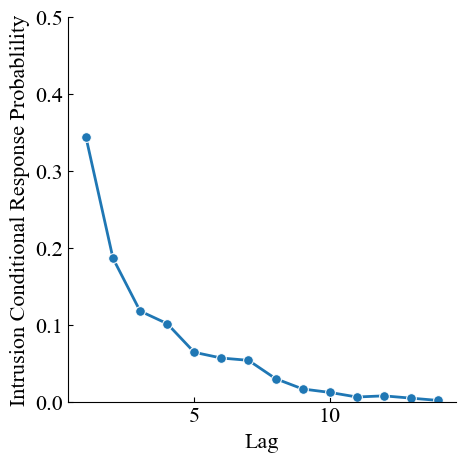

In [24]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

### ILI

In [25]:
df_ILI = df_simu.query("intrusion_type == 'ILI'")
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1534.0,1610.0,0.769270,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1248.0,1850.0,0.763325,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
11,1,0,506,232.0,3430.0,0.756408,DUNE,1534,11,0,False,1.0,9.0,0.0,-2.0,ILI
16,2,0,173,492.0,2040.0,0.836978,BRIDE,414,10,0,False,2.0,11.0,0.0,1.0,ILI
19,2,0,605,688.0,1580.0,0.663549,FRIAR,920,0,1,False,2.0,1.0,0.0,1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63979,13,499,42,309.0,3000.0,0.606081,ARTICLE,822,7,0,False,13.0,0.0,0.0,-7.0,ILI
63983,13,499,1539,640.0,2220.0,0.694598,UNIFORM,264,10,1,False,13.0,11.0,0.0,1.0,ILI
63986,14,499,263,1149.0,4630.0,0.667107,CAVE,882,3,1,False,14.0,2.0,0.0,-1.0,ILI
63995,15,499,1297,1205.0,2600.0,0.652096,SHRIMP,1053,3,0,False,15.0,1.0,0.0,-2.0,ILI


In [26]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.798473
2    -1.998432
3    -1.987791
4    -2.185733
5    -2.322249
6    -2.071002
7    -2.278071
8    -2.074342
9    -2.399834
10   -2.170262
11   -2.179205
12   -2.273892
13   -2.412729
14   -2.237205
15   -2.450505
Name: pos_lag, dtype: float64

In [27]:
possible_ILI_cnt = {}
for pair_pos in df_ILI.study_pos:
    l_bound = -pair_pos
    r_bound = 11 - pair_pos
    for i in np.arange(l_bound, r_bound + 1):
        if i in possible_ILI_cnt:
            possible_ILI_cnt[i] += 1
        else:
            possible_ILI_cnt[i] = 1
possible_ILI_cnt

{-10: 2962,
 -9: 4788,
 -8: 6694,
 -7: 8560,
 -6: 10468,
 -5: 12394,
 -4: 14291,
 -3: 16164,
 -2: 17955,
 -1: 19325,
 0: 20513,
 1: 19201,
 2: 17551,
 -11: 1312,
 3: 15725,
 4: 13819,
 5: 11953,
 6: 10045,
 7: 8119,
 8: 6222,
 9: 4349,
 10: 2558,
 11: 1188}

In [28]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt')
df_ILIgp['poss_ILI_cnt'] = pd.Series(possible_ILI_cnt)
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / df_ILIgp['poss_ILI_cnt']
df_ILIgp

,ILI_cnt,poss_ILI_cnt,ILI_prob
pos_lag,,,
-11.0,503,1312,0.383384
-10.0,734,2962,0.247806
-9.0,836,4788,0.174603
-8.0,864,6694,0.129071
-7.0,1064,8560,0.124299
-6.0,1058,10468,0.101070
-5.0,1173,12394,0.094643
-4.0,1257,14291,0.087957
-3.0,1448,16164,0.089582


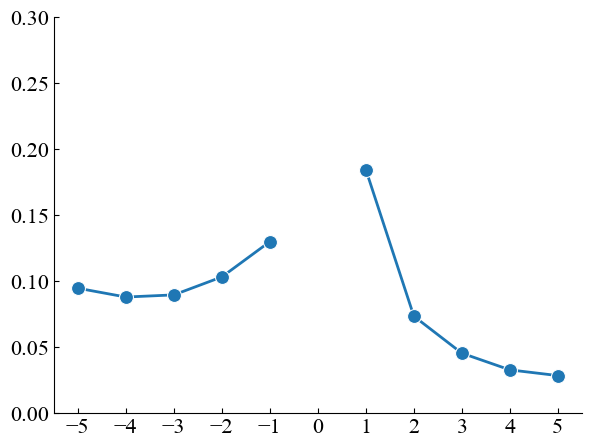

In [31]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
# plt.tick_params(labelleft=False)

# plt.savefig('simu7_fig/simu7_ILI.pdf')
plt.show()